# 1  Regularized Linear Regression
Recall the problem of linear regression and the derivation of its various learning algorithms.We are given a data set{(xi,yi)}ni=1, wherexi∈Rd(i.e., each data point hasdfeatures) andyi∈R.  The hypothesis class we consider in linear regression is, for w ∈ Rd+1:

$\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $

# 2  California House Prices Prediction
The file housing.csv contains data on median house prices in California districts, derived fromthe 1990 census data.  The data set contains 20,640 rows, one row per district (house block).
Each row contains the following features: 

- longitude:  
    - how far west a house is; a higher value is farther west. 
- latitude:  
    - how far north a house is; a higher value is farther north. 
- housing_median_age:  
    - median  age  of  a  house  within  the  block;  a  lower  number  is  anewer building.
- total_rooms:  
    - total number of rooms within the block.
- total_bedrooms:  
    - total number of bedrooms within the block.
- population:  
    - total number of people residing within the block.
- households:  
    - total  number  of  households  (a  group  of  people  residing  within  a  homeunit) within the block.
- median_income:  
    - median income for households within the block (measured in tens ofthousands of US dollars).
- median_house_value:  
    - median house value for households within the block (measuredin US dollars).
- ocean_proximity:  
    - location of the house with respect to the ocean.  Can have one ofthe following values:  NEAR BAY, NEAR OCEAN,<1H OCEAN, INLAND, ISLAND.

The objective in this data set is to predict the median house value in a given district basedon the values of the other features.

In [ ]:
# Download Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('housing.csv')

#data['coor'] = data['latitude'].astype(str) + ', ' + data['longitude'].astype(str)
# X, y = data.data, data.target
feature_names = list(data)

### 1.  Explore the data set and display summary statistics of the data.  What can you learn from it on the data?

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


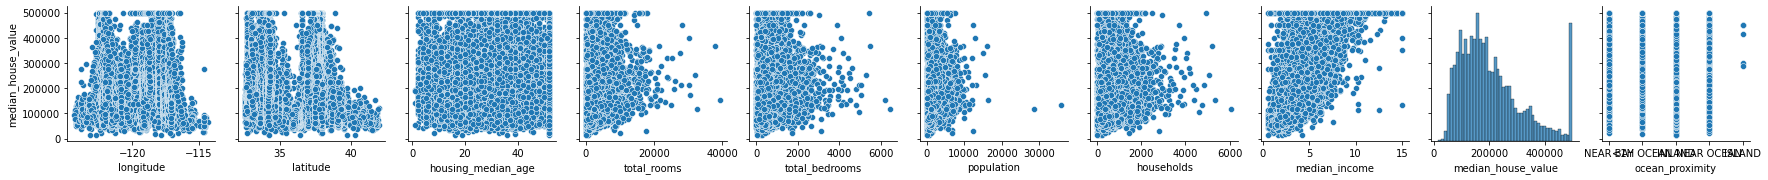

In [ ]:
sns.pairplot(data=data, y_vars=['median_house_value'], x_vars=feature_names);

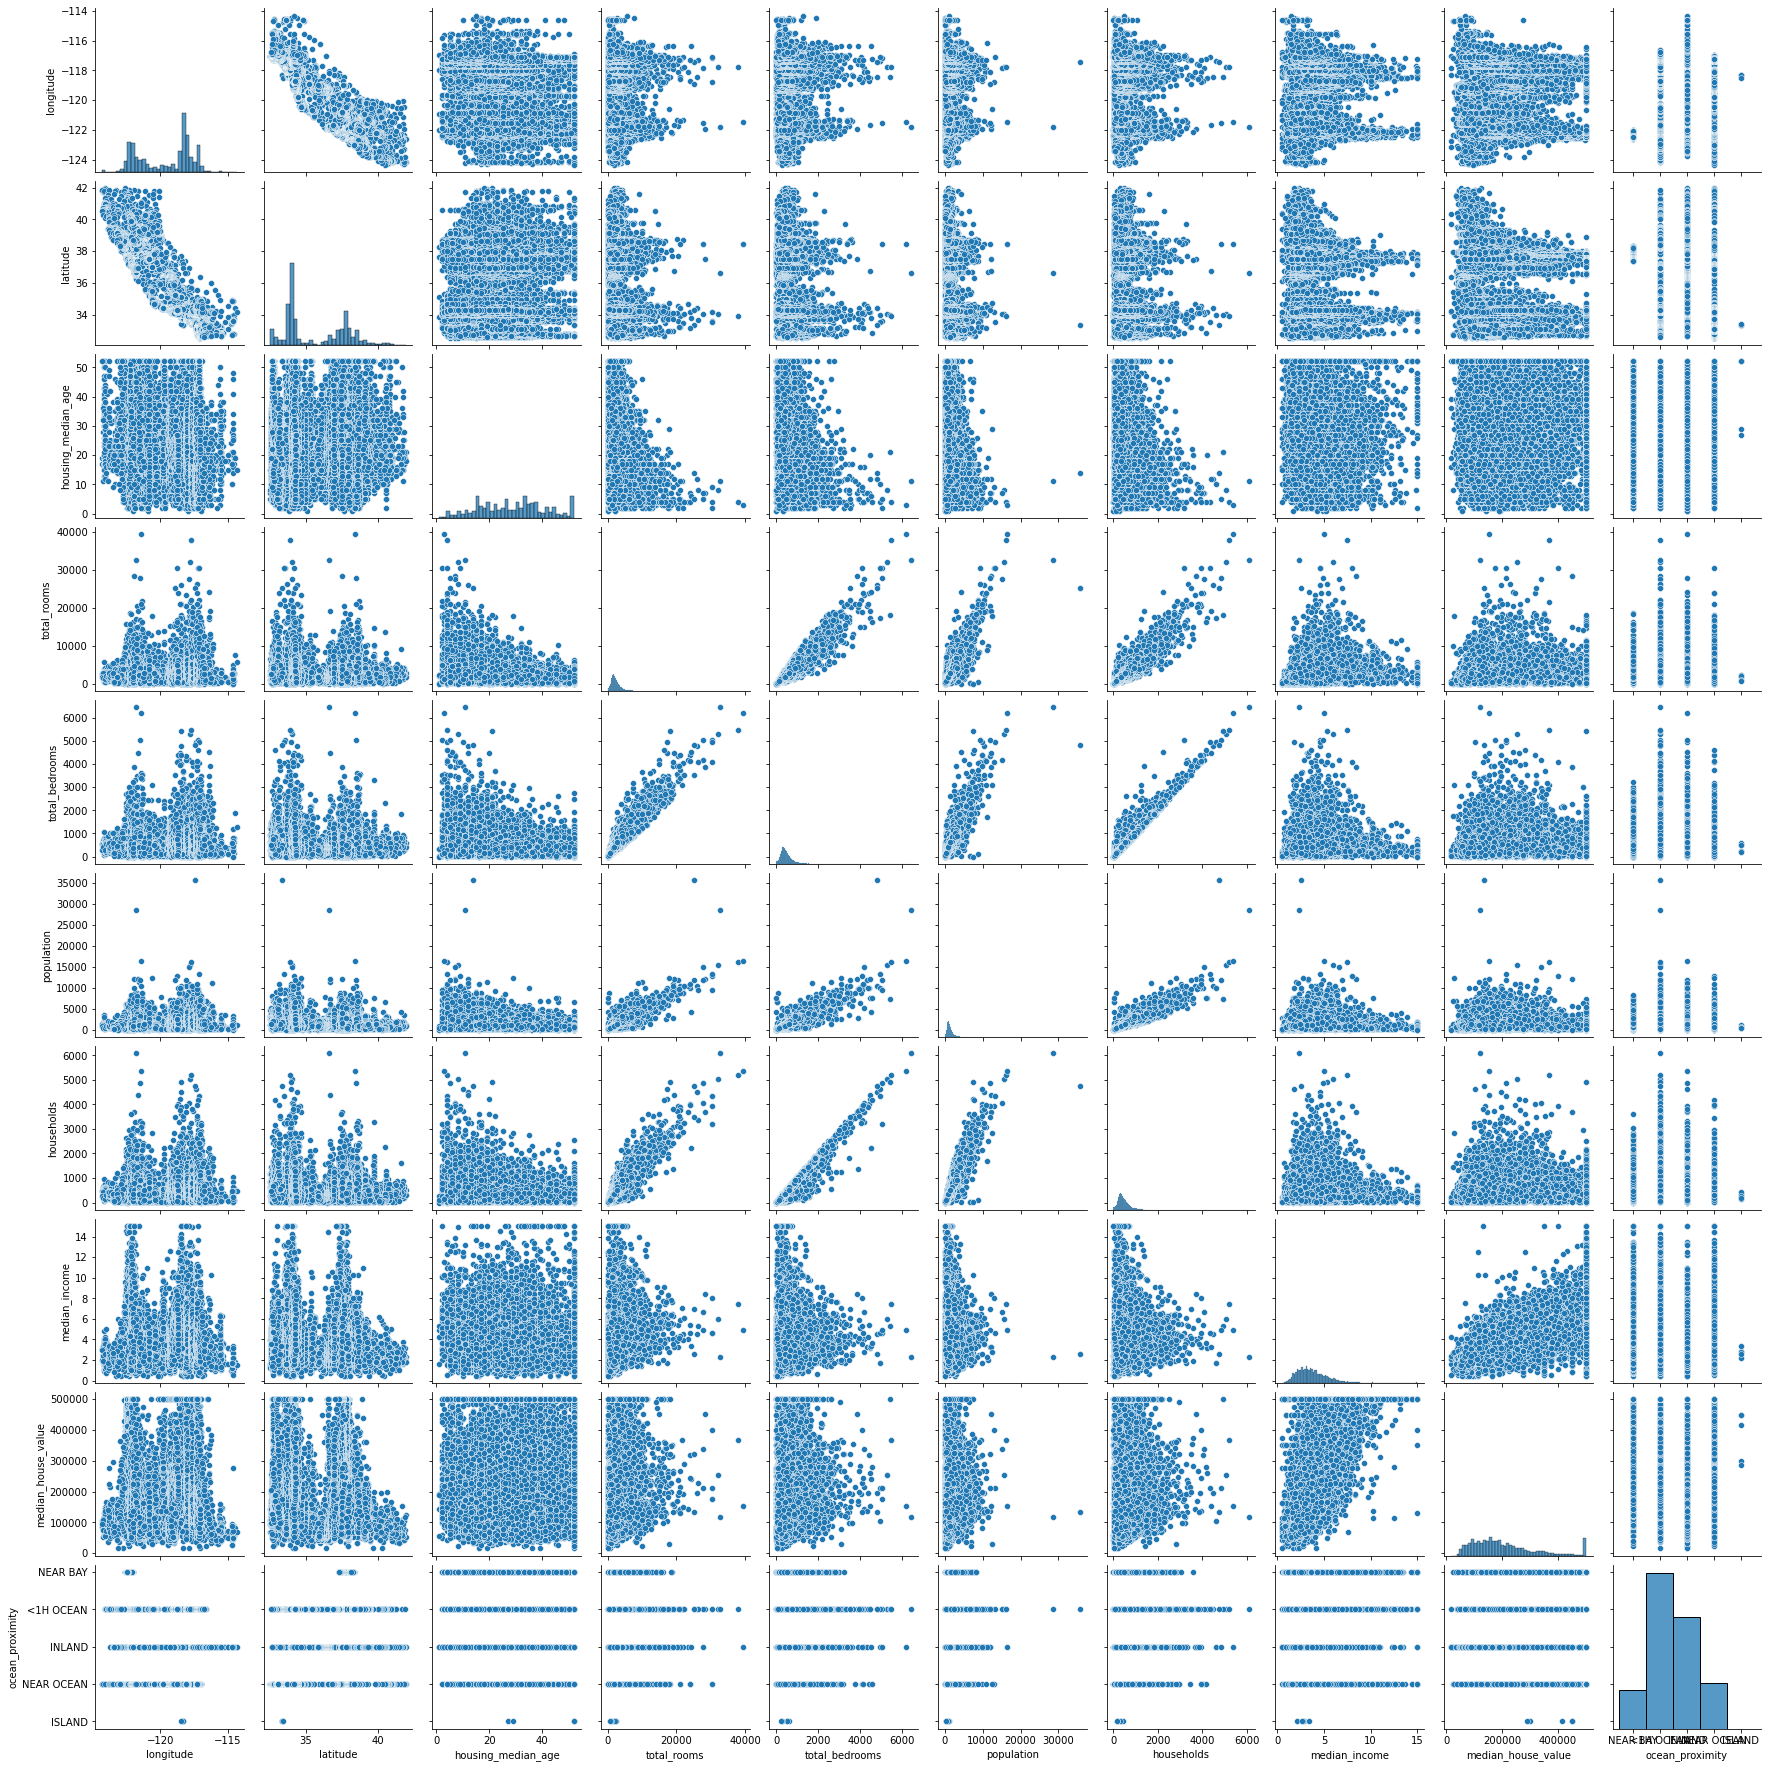

In [ ]:
sns.pairplot(data=data, y_vars=feature_names, x_vars=feature_names);

#### Observations
- The target variable median_house_value appearst to be a right skewed normal distribution.
- Latitude and Longitude are not very useful by themselves and should be dropped from the dataset.
- Housing_median_age appears to have a large amount of records that exceed the maximum value on both age and value as there is a distinct border of observations around the chart.
- total_rooms, total_bedrooms, population, households, and median_income also exceed the maximum of the median house value.
- total_rooms, total_bedrooms, population, and households appear to be normally distributed as well but the limits of the recordings makes this difficult to say with certainty just from an initial visual analysis
- median_income has an upward positive trend with median_house_value.

### 2.  Compute  the  correlation  between  each  feature  and  the  target median_house_value. Which features have strong correlation with the target?

In [ ]:
data.corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

#### Observations
The strongest correlations (+/- 0.1 or greater) are:
- median_income:   0.688
- latitude:   -0.144
- total_rooms:   0.134
- housing_median_age:   0.106

These make sense to be have stronger correlations as:
- median_income:   the higher your income, the higher value home that you can afford.
- latitude:   indicates that more southern homes are more expensive
- total_rooms:   larger number of rooms would indicate a larger house which would typically be higher valued
- housing_median_age:   older homes might be larger mansion type houses or in a better location

### 3.  Which  actions  do  you  need  to  take  in  order  to  prepare  the  data  set  for  the  learning algorithm?  Identify at least four such actions.

1. Remove/ Impute NaNs
2. Encode Categorical Features
3. Scale Numerical Features
4. Dimensionality Reduction

### 4.  Clean the data set using the data preprocessing techniques discussed in class.  Show a sample of the data set before and after the cleaning.

#### Impute NaN

In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
data['total_bedrooms'].fillna((data['total_bedrooms'].median()), inplace= True)

In [ ]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Feature Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
enc = OneHotEncoder()
lbl = LabelEncoder()

In [ ]:
dl = data.apply(lbl.fit_transform)

In [ ]:
de = pd.get_dummies(data, columns =['ocean_proximity'])

In [ ]:
de.corr()['median_house_value']

longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049457
population                   -0.024650
households                    0.065843
median_income                 0.688075
median_house_value            1.000000
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND        0.023416
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
Name: median_house_value, dtype: float64

In [ ]:
dl.corr()['median_house_value']

longitude            -0.045657
latitude             -0.152535
housing_median_age    0.099078
total_rooms           0.182167
total_bedrooms        0.064691
population           -0.021477
households            0.083988
median_income         0.675797
median_house_value    1.000000
ocean_proximity       0.077796
Name: median_house_value, dtype: float64

#### Dimensionality Reduction
Total Bedrooms, Population, and Households might be good features to remove as their correlation is so low

#### Scale Features

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
#scaler = StandardScaler()
#scaler.fit_transform(de)

In [ ]:
scaler = RobustScaler()
scaler.fit_transform(de)

array([[-0.98680739,  0.95767196,  0.63157895, ...,  0.        ,
         1.        ,  0.        ],
       [-0.98416887,  0.95238095, -0.42105263, ...,  0.        ,
         1.        ,  0.        ],
       [-0.98944591,  0.94973545,  1.21052632, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.72031662,  1.36772487, -0.63157895, ...,  0.        ,
         0.        ,  0.        ],
       [-0.74670185,  1.36772487, -0.57894737, ...,  0.        ,
         0.        ,  0.        ],
       [-0.72559367,  1.35185185, -0.68421053, ...,  0.        ,
         0.        ,  0.        ]])

### 5.  Extract at least two new features from the data set that have strong correlation with the target feature.

In [ ]:
df = de

df['rooms_per_beds'] = df['total_rooms'] /df['total_bedrooms']
df['age/income'] = df['housing_median_age']/df['median_income']
df['population/income'] = df['population']/df['median_income']

df.corr()['median_house_value'].abs().sort_values(ascending=False).reset_index()
#f = df.corr()['median_house_value'].abs().sort_values(ascending=False).reset_index()
#f = f[f['median_house_value'] > .1]
#f
#f['index']

,index,median_house_value
0,median_house_value,1.000000
1,median_income,0.688075
2,ocean_proximity_INLAND,0.484859
3,rooms_per_beds,0.367217
4,age/income,0.320028
5,population/income,0.280478
6,ocean_proximity_<1H OCEAN,0.256617
7,ocean_proximity_NEAR BAY,0.160284
8,latitude,0.144160
9,ocean_proximity_NEAR OCEAN,0.141862


### 6.  Run  linear  regression  on  the  transformed  data  set.   Use  80%  of  the  data  set  as  your training  set  and  20%  as  your  test  set.   Compute  RMSE  and R2 score  both  on  the training and the test sets.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold

pipel = Pipeline([
    ('vt', VarianceThreshold(threshold=.05)),
    ('scaler', RobustScaler()),
    ('reg', LinearRegression())
])

In [ ]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
pipel.fit(X_train, y_train)
pipel.fit(X_test, y_test)

Pipeline(steps=[('scaler', RobustScaler()), ('reg', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

In [ ]:
y_train_pred = pipel.predict(X_train)

rmse = np.sqrt(MSE(y_train, y_train_pred))
print(rmse, MSE(y_train, y_train_pred))

68761.36680943982 4728125565.502331


In [ ]:
pipel.score(X_train, y_train)

0.6467254746467668

In [ ]:
y_test_pred = pipel.predict(X_test)

rmse = np.sqrt(MSE(y_test, y_test_pred))
print(rmse, MSE(y_test, y_test_pred))

67776.99843414678 4593721516.742334


In [ ]:
pipel.score(X_test, y_test)

0.6477085588935958

In [ ]:
def plot_residuals(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, y_train_pred - y_train,
               s=5, marker = 'o', c='r', label='Training')
    plt.scatter(y_test_pred, y_test_pred - y_test,
               s=5, marker='s', c='g', label='Test')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend()
    xmin = min(y_train_pred.min(), y_test_pred.min())
    xmax = max(y_train_pred.max(), y_test_pred.max())
    plt.hlines(y=0, xmin=xmin, xmax=xmax)
    plt.xlim(xmin, xmax)

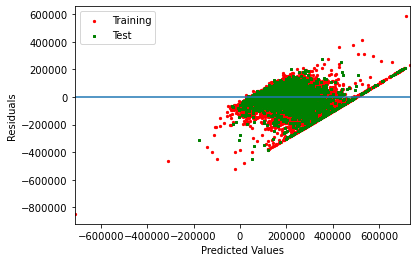

In [ ]:
plot_residuals(y_train_pred, y_train, y_test_pred, y_test)

### 7.  Does  adding  regularization  improve  the  results?   Which  value  of λ provides  the  best RMSE on the test set?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def PolyReg(degree=2):
    return Pipeline([('polyfeatures', PolynomialFeatures(degree=2)),
                     ('reg', LinearRegression())])

In [ ]:
from sklearn.linear_model import Ridge

def RidgePolynomialRegression(degree=2, alpha=1):
    return Pipeline([('scaler', RobustScaler()),
                    ('polyfeatures', PolynomialFeatures(degree)),
                    ('ridge', Ridge(alpha))])

In [ ]:
reg = RidgePolynomialRegression()

In [ ]:
reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('polyfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1))])

In [ ]:
y_train_pred = reg.predict(X_train)

rmse = np.sqrt(MSE(y_train, y_train_pred))
print(rmse, MSE(y_train, y_train_pred))

60037.586828310516 3604511832.166924


In [ ]:
reg.score(X_train, y_train)

0.7306792746940096

In [ ]:
reg.fit(X_test, y_test)

Pipeline(steps=[('scaler', RobustScaler()),
                ('polyfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1))])

In [ ]:
y_test_pred = reg.predict(X_test)

rmse = np.sqrt(MSE(y_test, y_test_pred))
print(rmse, MSE(y_test, y_test_pred))

58449.88387158353 3416388924.6016


In [ ]:
reg.score(X_test, y_test)

0.737997923199887

In [ ]:
alpha = .00001
while alpha <= 10000:

    reg = RidgePolynomialRegression(alpha=alpha)
    
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    
    reg.fit(X_test, y_test)
    y_test_pred = reg.predict(X_test)

    print('alpha: ', alpha)
    print('train - score: ', reg.score(X_train, y_train))
    print('train - RMSE:', np.sqrt(MSE(y_train, y_train_pred)))
    print('test - score: ', reg.score(X_test, y_test))
    print('test - RMSE:', np.sqrt(MSE(y_test, y_test_pred)))
    print()
    alpha *= 10
    

alpha:  1e-05
train - score:  0.5400132892811443
train - RMSE: 59920.937492592326
test - score:  0.7426535180939032
test - RMSE: 57928.2492981547

alpha:  0.0001
train - score:  0.5400137351315889
train - RMSE: 59920.93749557146
test - score:  0.7426535176503715
test - RMSE: 57928.24934807382

alpha:  0.001
train - score:  0.5400180650693398
train - RMSE: 59920.93779315006
test - score:  0.7426534734853415
test - RMSE: 57928.25431880964

alpha:  0.01
train - score:  0.540049077853259
train - RMSE: 59920.967220011466
test - score:  0.7426492384223649
test - RMSE: 57928.73096949377

alpha:  0.1
train - score:  0.5395577259071054
train - RMSE: 59923.607587873485
test - score:  0.7423573387533615
test - RMSE: 57961.57444186447

alpha:  1.0
train - score:  0.530513675287878
train - RMSE: 60037.586828310516
test - score:  0.737997923199887
test - RMSE: 58449.88387158353

alpha:  10.0
train - score:  0.5453931154607434
train - RMSE: 60666.64746834615
test - score:  0.7277163947353174
test - R

An Alpha of .00001 has the best RMSE score for the test set at 57928.249. The training and test scores are also better, each in the .70 range compared to Linear's .60

### 8.  Now replace linear regression with DecisionTreeRegressor (in sklearn.tree).  What is the RMSE on the training and test this time?  Which phenomenon is observed here?

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg = Pipeline([('scaler', RobustScaler()),
        ('reg', DecisionTreeRegressor())])

In [ ]:
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
reg.score(X_train, y_train)

1.0

In [ ]:
np.sqrt(MSE(y_train, y_train_pred))

0.0

In [ ]:
reg.fit(X_test, y_test)
y_test_pred = reg.predict(X_test)
reg.score(X_test, y_test)

1.0

In [ ]:
np.sqrt(MSE(y_test, y_test_pred))

0.0

This model is displaying extreme overfitting with 0 error and perfect test/ training predictions